In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd drive/
%cd My\ Drive/
%cd Colab\ Notebooks
%cd FSI/
%cd Scene 
%ls

/content/drive
/content/drive/My Drive
/content/drive/My Drive/Colab Notebooks
/content/drive/My Drive/Colab Notebooks/FSI
/content/drive/My Drive/Colab Notebooks/FSI/Scene
imagens_base.png  scene_base.ipynb  scene-test.arff  scene-train.arff


# **Base Scenes**

Essa base possui 1211 imagens de treinamento e 1196 imagens de teste. A base já é previamente pré-processada e são fornecidos dois arquivos no formato arff com 294 atributos numéricos para cada exemplo.

![alt text](https://drive.google.com/uc?id=1T6m97QPF_qkUpAXwSO5ylAfIkY0emX22)

## **Implementação**

Imports necessários para o código.

In [0]:
from scipy.io import arff
import pandas as pd
import numpy as np
import sys
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import Perceptron 
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize

Então, os dados de teste são lidos do arquivo no formato arff.

In [4]:
sys.path.append('.')
data = arff.loadarff('scene-train.arff')
print(type(data))
print(type(data[0]))
print(type(data[1]))

<class 'tuple'>
<class 'numpy.ndarray'>
<class 'scipy.io.arff.arffread.MetaData'>


Os dados de interesse são transformados para o formato DataFrame.

In [5]:
df_train = pd.DataFrame(data[0])
df_train.dtypes

Att1           float64
Att2           float64
Att3           float64
Att4           float64
Att5           float64
                ...   
Sunset          object
FallFoliage     object
Field           object
Mountain        object
Urban           object
Length: 300, dtype: object

Como os dados relativos às classes estão no formato byte array, é necessário tranformar para um inteiro de 64 bits.

In [6]:
converte = {
    'Beach':{b'0': 0, b'1': 1},
    'Sunset':{b'0': 0, b'1': 1},
    'FallFoliage':{b'0': 0, b'1': 1},
    'Field':{b'0': 0, b'1': 1},
    'Mountain':{b'0': 0, b'1': 1},
    'Urban':{b'0': 0, b'1': 1}
}
df_train.replace(converte, inplace=True)
df_train.dtypes

Att1           float64
Att2           float64
Att3           float64
Att4           float64
Att5           float64
                ...   
Sunset           int64
FallFoliage      int64
Field            int64
Mountain         int64
Urban            int64
Length: 300, dtype: object

In [0]:
categories = ['Beach','Sunset','FallFoliage','Field','Mountain','Urban']

Os dados de teste são separados em atributos e rótulos.

In [8]:
x_train = df_train.drop(categories, axis=1)
y_train = df_train[categories].values
print(x_train)
print(y_train)

          Att1      Att2      Att3  ...    Att292    Att293    Att294
0     0.646467  0.666435  0.685047  ...  0.247298  0.014025  0.029709
1     0.770156  0.767255  0.761053  ...  0.137833  0.082672  0.036320
2     0.793984  0.772096  0.761820  ...  0.051125  0.112506  0.083924
3     0.938563  0.949260  0.955621  ...  0.031290  0.049780  0.090959
4     0.512130  0.524684  0.520020  ...  0.238796  0.164270  0.184290
...        ...       ...       ...  ...       ...       ...       ...
1206  0.917676  0.918483  0.919618  ...  0.053978  0.060440  0.043268
1207  0.740662  0.724838  0.763497  ...  0.294021  0.122148  0.301926
1208  0.856390  1.000000  1.000000  ...  0.019464  0.022167  0.043738
1209  0.805592  0.804170  0.811438  ...  0.346736  0.231481  0.332623
1210  0.855064  0.858896  0.911177  ...  0.262119  0.104471  0.347280

[1211 rows x 294 columns]
[[1 0 0 0 1 0]
 [1 0 0 0 0 1]
 [1 0 0 0 0 0]
 ...
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]]


### **Treinamento**

Treinamento de dois classificadores usando svm e perceptron.

In [0]:
mltout_clf_svm = MultiOutputClassifier(svm.SVC(), n_jobs=-1).fit(x_train,y_train)
mltout_clf_per = MultiOutputClassifier(Perceptron(), n_jobs=-1).fit(x_train,y_train)

### **Teste**

Função para mostrar a matriz de confusão.

In [0]:
def plot_confusion_matrix(y_true, y_pred, classes, title):
    # Calcula acurácia
    acc = accuracy_score(y_true, y_pred)

    plt.figure(figsize=(10,10))

    for i in range(6):
      # Constroi matriz de confusão
      cm = multilabel_confusion_matrix(y_true, y_pred)[i]
      cm = normalize(cm, axis=1, norm='l1')
      cm_df = pd.DataFrame(cm, index = classes, columns = classes)
      plt.subplot(3,3,i+1)     
      sns.heatmap(cm_df, annot=True, cmap="YlGnBu")
      plt.title(title[i])
      plt.ylabel('True label')
      plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [0]:
data_test = arff.loadarff('scene-test.arff')
df_test = pd.DataFrame(data_test[0])
df_test.replace(converte, inplace=True)
x_test = df_test.drop(categories, axis=1)
y_test = df_test[categories]

**SVM**

In [0]:
# Gera o array com as predições para cada exemplo
y_pred_svm = mltout_clf_svm.predict(x_test)

In [13]:
# Acurácia do método
print("Acurácia:",mltout_clf_svm.score(x_test,y_test))

Acurácia: 0.5869565217391305


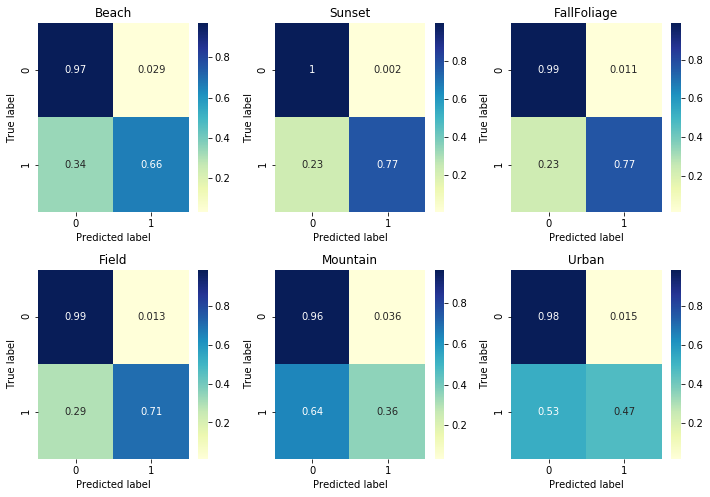

In [14]:
# Matriz de confusão para cada rótulo
plot_confusion_matrix(y_test, y_pred_svm, classes=[0,1], title=categories)


**Perceptron**

Acurácia:  0.3754180602006689


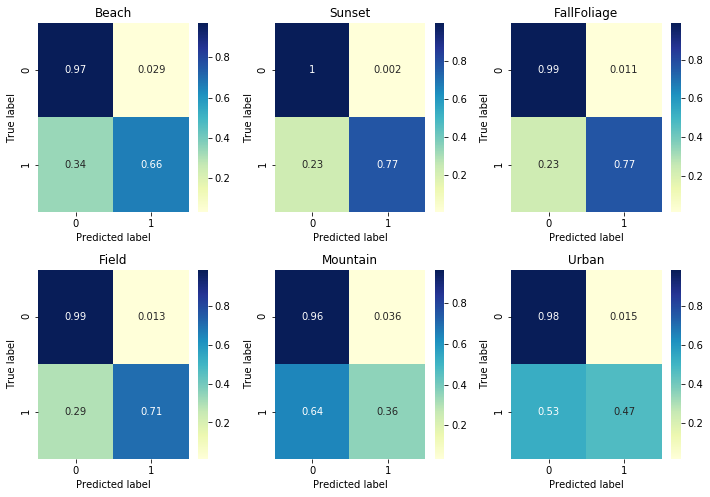

In [15]:
# Gera o array com as predições para cada exemplo
y_pred_per = mltout_clf_per.predict(x_test)

# Acurácia do método
print("Acurácia: ",mltout_clf_per.score(x_test,y_test))

# Matriz de confusão para cada rótulo
plot_confusion_matrix(y_test, y_pred_svm, classes=[0,1], title=categories)